# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [60]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [100]:
df = pd.read_csv(r"data\nndb_flat.csv")
df.head(5)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [63]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

<Axes: >

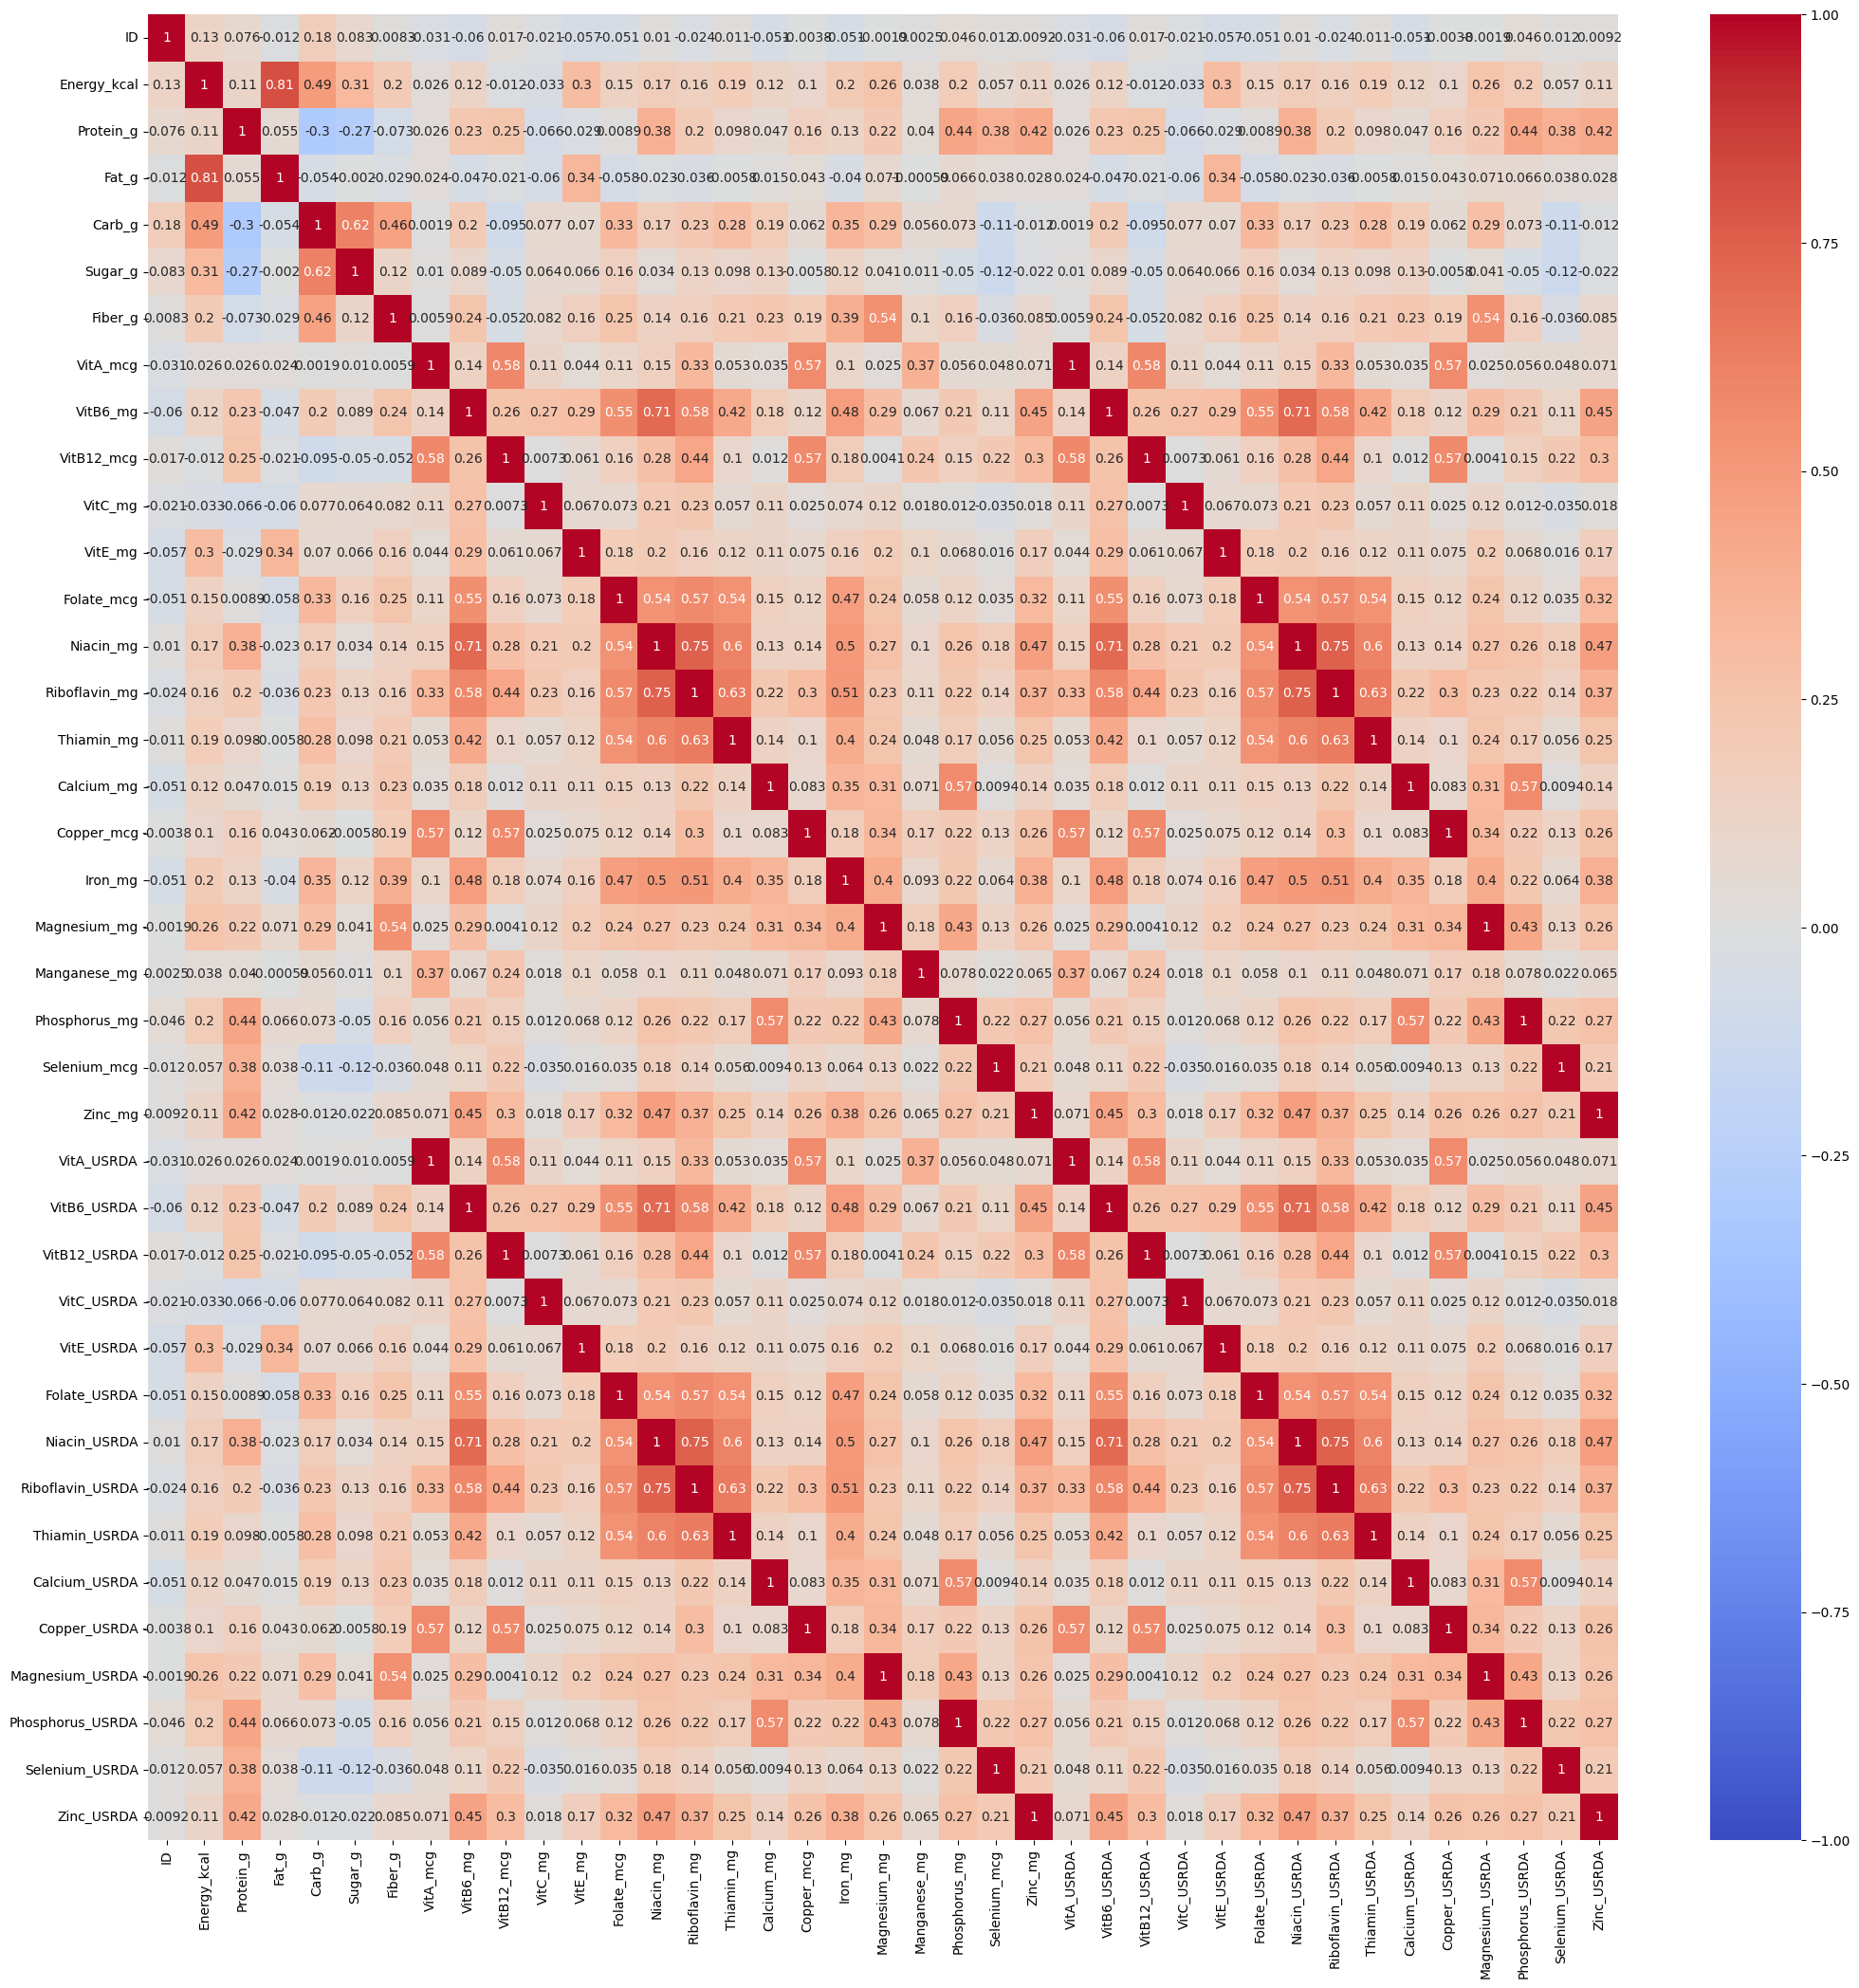

In [64]:

df_num = df.drop(columns=["FoodGroup","ShortDescrip","Descrip","CommonName","MfgName","ScientificName"])


plt.figure(figsize=(25, 25))
sns.heatmap(df_num.corr(), vmin=-1, vmax=1,cmap='coolwarm',annot=True)

In [65]:
# Haz un heatmap de 25 x 25 inches

# intenta fijar el valor mínimo en -1 y el valor máximo en 1

# prueba a personalizarlo a tu gusto, no es necesario que quede igual que el ejemplo

In [66]:
# ¿Cuántas columnas contienen 'USRDA'?

col_USRDA = []

for col in df.columns:
    if col.endswith("_USRDA"):
        col_USRDA.append(col)

print(len(col_USRDA))


15


In [67]:
# df.columns

df.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [68]:
# dropea las columnas que contengan 'USRDA'

df = df.drop(columns=col_USRDA)

### Variables no numéricas
Elimina las variables de texto del dataset

In [69]:
# revisa los tipos del dataset resultante

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              8618 non-null   int64  
 1   FoodGroup       8618 non-null   object 
 2   ShortDescrip    8618 non-null   object 
 3   Descrip         8618 non-null   object 
 4   CommonName      1063 non-null   object 
 5   MfgName         1560 non-null   object 
 6   ScientificName  732 non-null    object 
 7   Energy_kcal     8618 non-null   float64
 8   Protein_g       8618 non-null   float64
 9   Fat_g           8618 non-null   float64
 10  Carb_g          8618 non-null   float64
 11  Sugar_g         8618 non-null   float64
 12  Fiber_g         8618 non-null   float64
 13  VitA_mcg        8618 non-null   float64
 14  VitB6_mg        8618 non-null   float64
 15  VitB12_mcg      8618 non-null   float64
 16  VitC_mg         8618 non-null   float64
 17  VitE_mg         8618 non-null   f

In [70]:
# elimina las variables de texto

df = df.select_dtypes(include=[int,float])
df.head(5)

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


In [71]:
df = df.drop(columns=["ID"],axis=1)
df.head(5)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables
Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [72]:
df = (df + 1)

In [73]:
df.head(5)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,718.0,1.85,82.11,1.06,1.06,1.0,685.0,1.003,1.17,1.0,...,1.034,1.005,25.0,1.000,1.02,3.0,1.000,25.0,2.0,1.09
1,718.0,1.85,82.11,1.06,1.06,1.0,685.0,1.003,1.13,1.0,...,1.034,1.005,25.0,1.016,1.16,3.0,1.004,24.0,2.0,1.05
2,877.0,1.28,100.48,1.00,1.00,1.0,841.0,1.001,1.01,1.0,...,1.005,1.001,5.0,1.001,1.00,1.0,1.000,4.0,1.0,1.01
3,354.0,22.40,29.74,3.34,1.50,1.0,199.0,1.166,2.22,1.0,...,1.382,1.029,529.0,1.040,1.31,24.0,1.009,388.0,15.5,3.66
4,372.0,24.24,30.68,3.79,1.51,1.0,293.0,1.065,2.26,1.0,...,1.351,1.014,675.0,1.024,1.43,25.0,1.012,452.0,15.5,3.60


In [74]:
# Hay que transformar todo el df a log

df_log = np.log(df)
df_log

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.157004,0.0,...,0.033435,0.004988,3.218876,0.000000,0.019803,1.098612,0.000000,3.218876,0.693147,0.086178
1,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.122218,0.0,...,0.033435,0.004988,3.218876,0.015873,0.148420,1.098612,0.003992,3.178054,0.693147,0.048790
2,6.776507,0.246860,4.609959,0.000000,0.000000,0.0,6.734592,0.001000,0.009950,0.0,...,0.004988,0.001000,1.609438,0.001000,0.000000,0.000000,0.000000,1.386294,0.000000,0.009950
3,5.869297,3.109061,3.392493,1.205971,0.405465,0.0,5.293305,0.153579,0.797507,0.0,...,0.323532,0.028587,6.270988,0.039221,0.270027,3.178054,0.008960,5.961005,2.740840,1.297463
4,5.918894,3.188004,3.423611,1.332366,0.412110,0.0,5.680173,0.062975,0.815365,0.0,...,0.300845,0.013903,6.514713,0.023717,0.357674,3.218876,0.011929,6.113682,2.740840,1.280934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,5.723585,2.970414,3.261935,0.000000,0.000000,0.0,3.871201,0.343590,2.564949,0.0,...,0.173953,0.019803,4.204693,0.095310,0.875469,4.110874,0.000000,5.541264,4.309456,0.741937
8614,4.718499,3.069912,0.609766,1.857859,0.000000,0.0,1.098612,0.106160,1.147402,0.0,...,0.023717,0.011929,2.397895,0.032467,0.457425,3.637586,0.028587,6.056784,3.122365,0.936093
8615,5.598422,0.000000,0.000000,4.305955,4.306764,0.0,0.000000,0.000000,0.000000,0.0,...,0.058269,0.122218,2.639057,0.019803,1.526056,2.397895,0.000000,2.197225,0.530628,0.173953
8616,4.510860,2.839078,0.875469,1.098612,0.000000,0.0,3.433987,0.122218,0.405465,0.0,...,0.113329,0.009950,2.397895,0.336472,1.504077,5.525453,0.000000,5.609472,3.346389,0.693147


array([[ 1.54041394, -1.37969871,  2.22252572, ..., -0.60719321,
        -0.7007746 , -1.02653251],
       [ 1.54041394, -1.37969871,  2.22252572, ..., -0.63094868,
        -0.7007746 , -1.08029176],
       [ 1.74566103, -1.72821981,  2.39348953, ..., -1.67362391,
        -1.18406043, -1.13613927],
       ...,
       [ 0.5368946 , -1.96180649, -1.51012816, ..., -1.20172081,
        -0.81408833, -0.90032061],
       [-0.57899174,  0.72461786, -0.76879934, ...,  0.78396183,
         1.14915612, -0.15377561],
       [-0.59032935,  0.90996043, -1.1667887 , ...,  0.54480405,
         0.82341485, -0.15377561]])

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [76]:
# Instancia un Standard Scaler

# Entrena con el df transformado, transforma y muestra el resultado


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_log)
df_scaled = scaler.transform(df_log)
df_scaled

array([[ 1.54041394, -1.37969871,  2.22252572, ..., -0.60719321,
        -0.7007746 , -1.02653251],
       [ 1.54041394, -1.37969871,  2.22252572, ..., -0.63094868,
        -0.7007746 , -1.08029176],
       [ 1.74566103, -1.72821981,  2.39348953, ..., -1.67362391,
        -1.18406043, -1.13613927],
       ...,
       [ 0.5368946 , -1.96180649, -1.51012816, ..., -1.20172081,
        -0.81408833, -0.90032061],
       [-0.57899174,  0.72461786, -0.76879934, ...,  0.78396183,
         1.14915612, -0.15377561],
       [-0.59032935,  0.90996043, -1.1667887 , ...,  0.54480405,
         0.82341485, -0.15377561]])

In [77]:
# Muestra el primer array resultante, verás que tiene 23 valores para nuestras 23 columnas

df_scaled[0]

array([ 1.54041394, -1.37969871,  2.22252572, -1.27933898, -0.75138074,
       -0.81781776,  2.36310494, -0.81136575, -0.45374885, -0.63501951,
        1.60542126, -0.38020629, -1.27804706, -0.68561875, -0.68260208,
        0.04349064, -0.6242369 , -1.2909693 , -1.3236149 , -0.47829422,
       -0.60719321, -0.7007746 , -1.02653251])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [79]:
pca= PCA(n_components=23)
pca.fit(df_scaled)
df_pca= pca.transform(df_scaled)
df_pca

array([[-2.13903189, -0.96801891, -1.46398817, ...,  0.18965049,
        -0.11318379, -0.9906675 ],
       [-2.1064854 , -0.90950144, -1.48058025, ...,  0.27098865,
        -0.10503073, -0.99697913],
       [-3.26782972, -1.13842955, -2.04233529, ..., -0.04375945,
        -0.02955105, -0.96973915],
       ...,
       [-2.93052905,  1.66440526, -1.24206984, ...,  0.48350769,
         0.59177161, -0.63639048],
       [ 1.11889546, -0.78083408,  0.80512618, ...,  0.65270747,
         0.98403199,  0.37786612],
       [ 0.37955124, -1.27668203,  1.59197004, ...,  0.34724908,
         0.3352501 , -0.52011023]])

In [80]:
# comprueba el shape de tu dataframe

df_pca.shape

(8618, 23)

In [81]:
pca.explained_variance_ratio_

array([0.3125111 , 0.16666503, 0.08532219, 0.07111741, 0.05904531,
       0.04487789, 0.03079514, 0.02718658, 0.02537361, 0.02262291,
       0.02194625, 0.01905314, 0.01852623, 0.01432524, 0.01349698,
       0.01297861, 0.01120283, 0.00974457, 0.00929553, 0.00746957,
       0.00693989, 0.00566242, 0.00384157])

In [84]:
pca.explained_variance_ratio_.cumsum()

array([0.3125111 , 0.47917612, 0.56449832, 0.63561572, 0.69466103,
       0.73953892, 0.77033406, 0.79752064, 0.82289426, 0.84551716,
       0.86746341, 0.88651656, 0.90504278, 0.91936803, 0.93286501,
       0.94584362, 0.95704645, 0.96679102, 0.97608654, 0.98355611,
       0.99049601, 0.99615843, 1.        ])

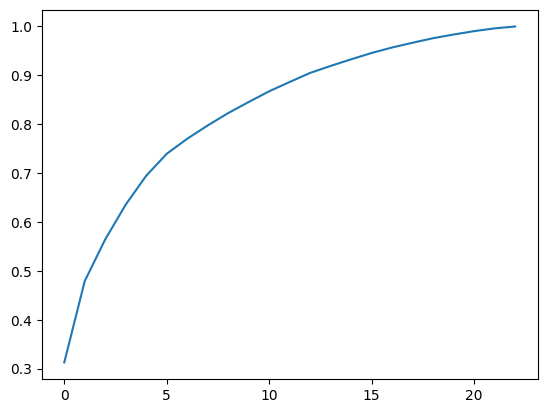

In [86]:
# plotea la suma acumulativa según el número de componentes

plt.plot(np.cumsum(pca.explained_variance_ratio_))

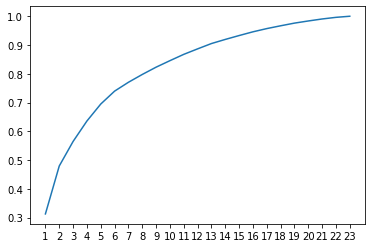

In [ ]:
# Nos quedamos con 6 PCs para casi un 80% de la varianza original

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [87]:
pca_6 = PCA(n_components=6)
pca_6.fit(df_scaled)
df_pca_6 = pca_6.transform(df_scaled)




In [88]:
df_pca_6.shape

(8618, 6)

In [27]:
# Instancia un nuevo PCA con n_components=6

# Entrena, transforma y obtén el shape

(8618, 6)

In [89]:
df_pca_6

array([[-2.13903188, -0.96801513, -1.46402551,  0.27092247,  4.06723772,
         0.30733678],
       [-2.10648538, -0.90949782, -1.48061568,  0.26328592,  4.03269609,
         0.3487277 ],
       [-3.2678297 , -1.13842535, -2.04237615,  1.17547106,  4.07201504,
         1.32672021],
       ...,
       [-2.93052908,  1.66440543, -1.24206578,  1.17233982, -0.91548528,
        -0.88592659],
       [ 1.11889537, -0.7808435 ,  0.80522915, -1.58205635,  1.64125808,
         1.08973901],
       [ 0.37955123, -1.27668401,  1.5919906 , -1.23586923,  0.71683282,
        -0.64348542]])

PCA(n_components=6)

In [96]:
# Monta un dataframe con los resultado y las columnas 'PC1','PC2','PC3','PC4','PC5','PC6'

df_pca_6 = pd.DataFrame(
    data=df_pca_6,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
)

df_pca_6.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968015,-1.464026,0.270922,4.067238,0.307337
1,-2.106485,-0.909498,-1.480616,0.263286,4.032696,0.348728
2,-3.267830,-1.138425,-2.042376,1.175471,4.072015,1.326720
3,1.525964,-1.264098,0.135972,-0.929711,2.430663,-2.094951
4,1.240712,-1.204117,0.004702,-1.191947,2.691913,-2.341840


In [97]:
# Monta un dataframe con los resultado y las columnas 'PC1','PC2','PC3','PC4','PC5','PC6'

df_pca_6_df = pd.DataFrame(df_pca_6, columns=[f'PC{i+1}' for i in range(6)])
df_pca_6_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968015,-1.464026,0.270922,4.067238,0.307337
1,-2.106485,-0.909498,-1.480616,0.263286,4.032696,0.348728
2,-3.267830,-1.138425,-2.042376,1.175471,4.072015,1.326720
3,1.525964,-1.264098,0.135972,-0.929711,2.430663,-2.094951
4,1.240712,-1.204117,0.004702,-1.191947,2.691913,-2.341840


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [35]:
# Necesitaremos la serie FoodGroup

0               Dairy and Egg Products
1               Dairy and Egg Products
2               Dairy and Egg Products
3               Dairy and Egg Products
4               Dairy and Egg Products
                     ...              
8613    Finfish and Shellfish Products
8614    Finfish and Shellfish Products
8615                            Sweets
8616    Finfish and Shellfish Products
8617    Finfish and Shellfish Products
Name: FoodGroup, Length: 8618, dtype: object

In [102]:
food_group_series = df['FoodGroup']
food_group_series

0               Dairy and Egg Products
1               Dairy and Egg Products
2               Dairy and Egg Products
3               Dairy and Egg Products
4               Dairy and Egg Products
                     ...              
8613    Finfish and Shellfish Products
8614    Finfish and Shellfish Products
8615                            Sweets
8616    Finfish and Shellfish Products
8617    Finfish and Shellfish Products
Name: FoodGroup, Length: 8618, dtype: object

In [105]:
food_group = df[['FoodGroup']]
food_group

,FoodGroup
0,Dairy and Egg Products
1,Dairy and Egg Products
2,Dairy and Egg Products
3,Dairy and Egg Products
4,Dairy and Egg Products
...,...
8613,Finfish and Shellfish Products
8614,Finfish and Shellfish Products
8615,Sweets
8616,Finfish and Shellfish Products


In [106]:
df_pca_6_df['FoodGroup'] = food_group
df_pca_6_df

,PC1,PC2,PC3,PC4,PC5,PC6,FoodGroup
0,-2.139032,-0.968015,-1.464026,0.270922,4.067238,0.307337,Dairy and Egg Products
1,-2.106485,-0.909498,-1.480616,0.263286,4.032696,0.348728,Dairy and Egg Products
2,-3.267830,-1.138425,-2.042376,1.175471,4.072015,1.326720,Dairy and Egg Products
3,1.525964,-1.264098,0.135972,-0.929711,2.430663,-2.094951,Dairy and Egg Products
4,1.240712,-1.204117,0.004702,-1.191947,2.691913,-2.341840,Dairy and Egg Products
...,...,...,...,...,...,...,...
8613,2.553661,-2.548708,0.472272,-0.109617,2.716035,0.018387,Finfish and Shellfish Products
8614,0.075018,-1.840928,0.935782,-1.349033,-0.392388,-0.759938,Finfish and Shellfish Products
8615,-2.930529,1.664405,-1.242066,1.172340,-0.915485,-0.885927,Sweets
8616,1.118895,-0.780844,0.805229,-1.582056,1.641258,1.089739,Finfish and Shellfish Products


In [108]:
for columnName in df_pca_6_df[['PC1','PC2','PC3','PC4','PC5','PC6']].columns:
    df_pca_6_df.sort_values(by=columnName, ascending=False, inplace=True)
    print(columnName)
    print(df_pca_6_df['FoodGroup'][:3])
    print("-"*50)

PC1
1832    Breakfast Cereals
1863    Breakfast Cereals
2025    Breakfast Cereals
Name: FoodGroup, dtype: object
--------------------------------------------------
PC2
4190                            Beverages
3577    Vegetables and Vegetable Products
3320    Vegetables and Vegetable Products
Name: FoodGroup, dtype: object
--------------------------------------------------
PC3
8537                        Beverages
4355                        Beverages
5277    Lamb, Veal, and Game Products
Name: FoodGroup, dtype: object
--------------------------------------------------
PC4
1850    Breakfast Cereals
1867    Breakfast Cereals
2025    Breakfast Cereals
Name: FoodGroup, dtype: object
--------------------------------------------------
PC5
776    Fats and Oils
632    Fats and Oils
786    Fats and Oils
Name: FoodGroup, dtype: object
--------------------------------------------------
PC6
7457    Beef Products
7458    Beef Products
4190        Beverages
Name: FoodGroup, dtype: object
----------

In [130]:
# df_final_merged = pd.merge(food, df_pca, left_index=True, right_index=True)
# Best way

In [131]:
# de nada :)
# for columnName in df_final_merged[['PC1','PC2','PC3','PC4','PC5','PC6']].columns:
#     df_final_merged.sort_values(by=columnName, ascending=False, inplace=True)
#     print(columnName)
#     print(df_final_merged['FoodGroup'][:3])
#     print("-"*50)

,FoodGroup,PC1,PC2,PC3,PC4,PC5,PC6
0,Dairy and Egg Products,-2.139032,-0.968019,-1.463967,0.270851,4.067039,0.306874
1,Dairy and Egg Products,-2.106485,-0.909502,-1.480567,0.263221,4.032494,0.348373
2,Dairy and Egg Products,-3.267830,-1.138430,-2.042335,1.175411,4.071730,1.326500
3,Dairy and Egg Products,1.525964,-1.264102,0.136046,-0.929817,2.430482,-2.095504
4,Dairy and Egg Products,1.240712,-1.204120,0.004784,-1.192000,2.691787,-2.342385
...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,2.553661,-2.548702,0.472283,-0.109458,2.716705,0.017503
8614,Finfish and Shellfish Products,0.075018,-1.840923,0.935789,-1.348908,-0.391982,-0.760173
8615,Sweets,-2.930529,1.664406,-1.242112,1.172462,-0.915640,-0.884892
8616,Finfish and Shellfish Products,1.118895,-0.780833,0.805093,-1.581764,1.641611,1.091033


In [132]:
# de nada :)
# for columnName in df_final_merged[['PC1','PC2','PC3','PC4','PC5','PC6']].columns:
#     df_final_merged.sort_values(by=columnName, ascending=False, inplace=True)
#     print(columnName)
#     print(df_final_merged['FoodGroup'][:3])
#     print("-"*50)

PC1
1832    Breakfast Cereals
1863    Breakfast Cereals
2025    Breakfast Cereals
Name: FoodGroup, dtype: object
--------------------------------------------------
PC2
4190                            Beverages
3577    Vegetables and Vegetable Products
3320    Vegetables and Vegetable Products
Name: FoodGroup, dtype: object
--------------------------------------------------
PC3
8537                        Beverages
4355                        Beverages
5277    Lamb, Veal, and Game Products
Name: FoodGroup, dtype: object
--------------------------------------------------
PC4
1850    Breakfast Cereals
1867    Breakfast Cereals
2025    Breakfast Cereals
Name: FoodGroup, dtype: object
--------------------------------------------------
PC5
776    Fats and Oils
632    Fats and Oils
786    Fats and Oils
Name: FoodGroup, dtype: object
--------------------------------------------------
PC6
7457    Beef Products
7458    Beef Products
4190        Beverages
Name: FoodGroup, dtype: object
----------